In [ ]:
!pip install gdown

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import copy
import gdown

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

gdown.download('https://drive.google.com/uc?id=18HCzpRnUzMYwrWJ4k6qnkgqhlLY735NO', 'data_hackaton_train.data', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=18HCzpRnUzMYwrWJ4k6qnkgqhlLY735NO
From (redirected): https://drive.google.com/uc?id=18HCzpRnUzMYwrWJ4k6qnkgqhlLY735NO&confirm=t&uuid=9a570a43-ba74-482e-8781-540a3ac17fea
To: c:\Users\paolo\Desktop\University\U2 - 2024-2025\PharmaHacks\PharmaHacks2025\data_hackaton_train.data
100%|██████████| 242M/242M [00:08<00:00, 28.4MB/s] 


'data_hackaton_train.data'

In [5]:
train_df = pd.read_pickle('data_hackaton_train.data')
train_df.shape

(400000, 6)

In [6]:
train_df

,start,moves,steps,solution,score,accepted_pair
269056,"[TAAGT---, AAGTT---, AAGCT---, CCCGT---, AATAT...","[B0+;3077, C0+;528, E0+;1132, F4+;4288, D4+;14...","[(2, 0), (3, 0), (5, 0), (6, 4), (4, 4), (1, 4)]","[TAAG-T, -AAGTT, -AAGCT, CCCG-T, -AATAT, AAAC-T]",18.0,"[(T, G), (-, T), (A, C), (A, C), (A, C), (G, T..."
499174,"[GCAATT--, GGAACT--, GCAATT--, CCAATC--, CCAGC...","[A3+;10686, B3+;465, D3+;707, C3+;665, F3+;156...","[(1, 3), (2, 3), (4, 3), (3, 3), (6, 3), (5, 5...","[GCA-A-TT, G-GAACT, GCA-A-TT, CC-A-ATC, CCAGC-...",26.0,"[(-, C), (C, T), (C, T), (C, G), (A, C), (A, C..."
85143,"[TTGA----, TGAG----, AAG-----, GTGA----, TGG--...","[C1+;13838, A0+;8192, D2+;11987]","[(3, 1), (1, 0), (4, 2)]","[-TTGA, TGAG, A-AG, GT-GA, TGG, TCGA]",15.0,"[(G, T), (T, G), (A, T), (G, T), (-, T), (-, G..."
260335,"[TACCTC------, GAACGC------, GGCAC-------, AGG...","[D0+;9860, F0+;4104, F1+;1535, G0+;3771, I0+;4...","[(4, 0), (6, 0), (6, 1), (7, 0), (9, 0)]","[TACCTC, GAACGC, GGCAC, -AGGTCC, AAAAGC, --GGT...",49.0,"[(-, C), (A, C), (A, G), (G, A), (-, T), (-, G..."
338124,"[GGAA---, ATAAA--, ATAAA--, GCAC---, TGAA---, ...","[B2+;12844, D2+;1042, C2+;1533, E2+;1442]","[(2, 2), (4, 2), (3, 2), (5, 2)]","[GGAA, AT-AAA, AT-AAA, GC-AC, TG-AA, AATA]",11.0,"[(C, T), (C, T), (T, G), (-, T), (A, C), (A, C..."
...,...,...,...,...,...,...
259178,"[TGGC---, TCCC---, CTCC---, CGTA---, GTGT---, ...","[C0+;4072, E0+;1769, C1+;2435, B1+;1018]","[(3, 0), (5, 0), (3, 1), (2, 1)]","[TGGC, T-CCC, --CTCC, CGTA, -GTGT, GGTAG]",12.0,"[(A, T), (A, G), (G, A), (T, G), (T, C), (T, G..."
365838,"[TCATAGCCT---, TCATAGGGC---, TCAATTTTT---, TCA...","[C2+;16917, D2+;1552, F5+;17050, B5+;11445, A8...","[(3, 2), (4, 2), (6, 5), (2, 5), (1, 8), (5, 8...","[TCATAGCC-T, TCATA-GGGC, TC-AATTTTT, TC-AAGATT...",43.0,"[(G, A), (-, C), (T, G), (C, T), (A, C), (-, T..."
131932,"[CAGT---, TAGT---, GCTT---, AAGT---, GAGT---, ...","[A0+;11501, B0+;1750]","[(1, 0), (2, 0)]","[-CAGT, -TAGT, GCTT, AAGT, GAGT, GGGC]",15.0,"[(G, A), (T, G), (G, A), (A, G), (G, T), (-, C..."
146867,"[TTTG---, GAAG---, GAGG---, GATG---, GTT----, ...","[A0+;4807, B1+;3803, C1+;4005, C2+;3369, D2+;2...","[(1, 0), (2, 1), (3, 1), (3, 2), (4, 2), (4, 2...","[-TTTG, GA-AG, G--AGG, GA-TG, GTT, A--A-CC]",19.0,"[(-, G), (-, T), (G, T), (A, T), (T, G), (G, T..."


In [7]:
DICT_SYMBOLS = {
    'A': 1,
    'T': 2,
    'C': 3,
    'G': 4}

In [8]:
class Puzzle:
    def __init__(self, data):
        self.start = list(data["start"])
        self.moves = copy.deepcopy(data.get("moves"))
        self.steps = copy.deepcopy(data.get("steps"))
        self.solution = list(data["solution"])
        self.score = data["score"]
        self.accepted_pair = data["accepted_pair"]

        self.padded_start = self.build_puzzle_to_end(self.start)
        self.padded_solution = self.build_puzzle_to_end(self.solution)

    def build_puzzle_to_end(self, puzzle):
        """Pad each row with '-' to match the longest row for visualization."""
        max_len = max(len(row) for row in puzzle)
        return [row.ljust(max_len, '-') for row in puzzle]

    def plot_puzzle(self, puzzle, title):
        puzzle = self.build_puzzle_to_end(puzzle)
        num_puzzle = np.array([[DICT_SYMBOLS.get(char, 0) for char in row] for row in puzzle])
        rot_num_puzzle = np.rot90(num_puzzle, 1)
        puzzle_array = np.array([list(row) for row in puzzle])
        rot_labels = np.rot90(puzzle_array, 1)

        plt.figure(figsize=(8, 6))
        sns.heatmap(rot_num_puzzle, annot=rot_labels, fmt="", cmap="Pastel1_r", cbar=False)
        plt.title(title)
        plt.axis("off")
        plt.show()

    def gearbox_score(self, puzzle, bonus=1.15):
        consensus = self.accepted_pair
        score = 0
        for col_ind in range(len(puzzle[0])):
            col_bonus = True
            col_tot = 0
            column_chars = [row[col_ind] for row in puzzle]
            for char in column_chars:
                if char == "-":
                    col_bonus = False
                    continue
                if char in consensus[col_ind]:
                    col_tot += 1
                else:
                    col_bonus = False
            column_score = col_tot * bonus if col_bonus else col_tot
            score += column_score
        print(f"Total Gearbox Score: {score}")
        return score

    def _apply_step_to_puzzle(self, puzzle, step):
        """Apply a single step to the puzzle."""
        new_puzzle = puzzle.copy()
        row_index = step[0] - 1
        col_index = step[1]
        if row_index < 0 or row_index >= len(new_puzzle):
            return new_puzzle
        row_str = new_puzzle[row_index]
        if col_index < 0 or col_index > len(row_str):
            return new_puzzle
        new_row = row_str[:col_index] + '-' + row_str[col_index:]
        new_row = new_row[:len(row_str)]
        new_puzzle[row_index] = new_row
        return new_puzzle

    def apply_all_steps(self):
        """Apply all steps on a copy of the puzzle and plot states."""
        current_puzzle = list(self.start)
        updated_puzzles = []
        scores = []

        for step in self.steps:
            current_puzzle = self._apply_step_to_puzzle(current_puzzle, step)
            padded_current = self.build_puzzle_to_end(current_puzzle)
            score = self.gearbox_score(padded_current)
            updated_puzzles.append(padded_current)
            scores.append(score)

        n_steps = len(updated_puzzles)
        fig, axes = plt.subplots(1, n_steps, figsize=(4 * n_steps, 6))
        if n_steps == 1:
            axes = [axes]
        for idx, (puzzle_state, score) in enumerate(zip(updated_puzzles, scores)):
            num_puzzle = np.array([[DICT_SYMBOLS.get(char, 0) for char in row] for row in puzzle_state])
            rot_num_puzzle = np.rot90(num_puzzle, 1)
            puzzle_array = np.array([list(row) for row in puzzle_state])
            rot_labels = np.rot90(puzzle_array, 1)
            ax = axes[idx]
            sns.heatmap(rot_num_puzzle, annot=rot_labels, fmt="", cmap="Pastel1_r", cbar=False, ax=ax)
            ax.set_title(f"Step {idx+1}\nScore: {score}")
            ax.axis("off")
        plt.tight_layout()
        plt.show()
        return current_puzzle

In [10]:
# Create puzzle
puzzle_data = {
    'start': train_df.iloc[-1]['start'],
    'moves': train_df.iloc[-1].get('moves'),
    'steps': train_df.iloc[-1].get('steps'),
    'solution': train_df.iloc[-1]['solution'],
    'score': train_df.iloc[-1]['score'],
    'accepted_pair': train_df.iloc[-1]['accepted_pair']
}

print(puzzle_data["accepted_pair"])
puzzle = Puzzle(puzzle_data)

[('-', 'C'), ('C', 'T'), ('C', 'T'), ('C', 'G'), ('A', 'C'), ('A', 'C'), ('C', 'T'), ('T', 'C'), ('C', 'T'), ('G', 'T'), ('G', 'A'), ('-', 'T')]


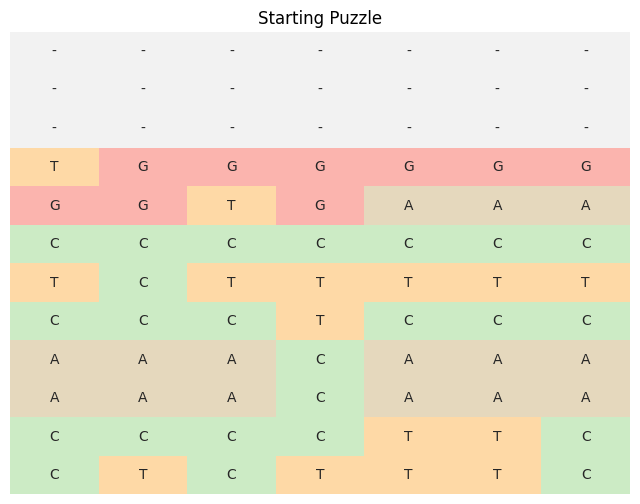

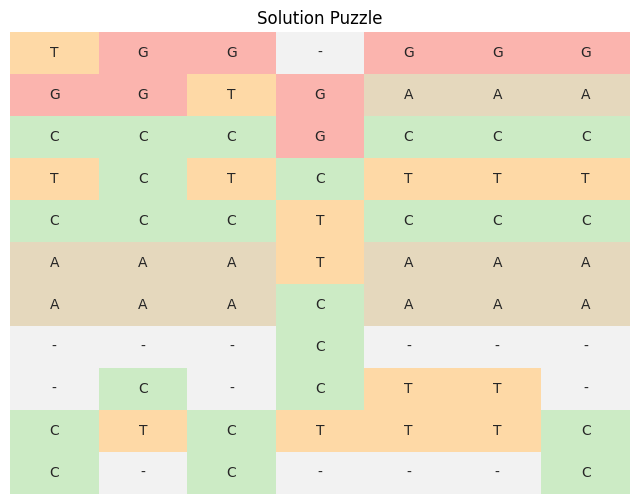

In [11]:
puzzle.plot_puzzle(puzzle.start, "Starting Puzzle")
puzzle.plot_puzzle(puzzle.solution, "Solution Puzzle")


Total Gearbox Score: 33.099999999999994
Total Gearbox Score: 37.15
Total Gearbox Score: 41.15
Total Gearbox Score: 45.14999999999999
Total Gearbox Score: 47.14999999999999
Total Gearbox Score: 50.14999999999999
Total Gearbox Score: 55.249999999999986
Total Gearbox Score: 56.249999999999986
Total Gearbox Score: 58.249999999999986
Total Gearbox Score: 59.249999999999986
Total Gearbox Score: 59.19999999999999
Total Gearbox Score: 60.19999999999999
Total Gearbox Score: 61.19999999999999


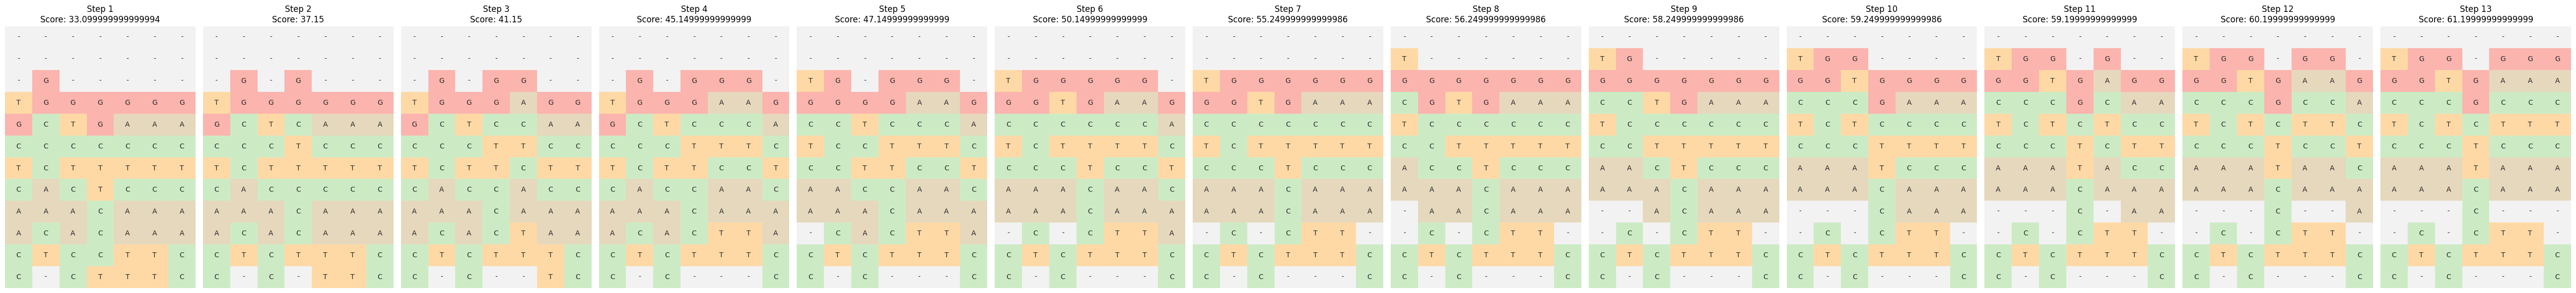

In [12]:
updated_puzzle = puzzle.apply_all_steps()

In [13]:
puzzle.steps

[(2, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (1, 2),
 (3, 2),
 (7, 2),
 (1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (6, 3),
 (7, 3)]

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from collections import deque
import random
import copy
import time
from tqdm import tqdm

In [37]:
# Fix random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [38]:
class MSAEnvironment:
    """Environment for Multiple Sequence Alignment"""

    def __init__(self, start_sequences, accepted_pairs, puzzle_instance=None):
        self.original_sequences = copy.deepcopy(start_sequences)
        self.sequences = copy.deepcopy(start_sequences)
        self.accepted_pairs = accepted_pairs
        self.puzzle_instance = puzzle_instance
        self.current_step = 0
        self.max_steps = 30  # Can be adjusted based on average steps in training data
        self.current_score = self._calculate_score()
        self.step_history = []
        self.best_score = self.current_score
        self.best_sequences = copy.deepcopy(self.sequences)

    def reset(self):
        """Reset the environment to initial state"""
        self.sequences = copy.deepcopy(self.original_sequences)
        self.current_step = 0
        self.current_score = self._calculate_score()
        self.step_history = []
        self.best_score = self.current_score
        self.best_sequences = copy.deepcopy(self.sequences)
        return self._get_state()

    def _get_state(self):
        """Get current state representation of the alignment"""
        # Find the maximum length of all sequences
        max_len = max(len(seq) for seq in self.sequences)

        # Create a uniform-length representation for all sequences
        padded_seqs = []
        for seq in self.sequences:
            padded_seq = list(seq) + ['-'] * (max_len - len(seq))
            padded_seqs.append(padded_seq)

        # Convert to numpy array
        state = np.zeros((len(self.sequences), max_len, 5))  # 5 for A, T, G, C, -

        # One-hot encode
        for i, seq in enumerate(padded_seqs):
            for j, base in enumerate(seq):
                if base == 'A':
                    state[i, j, 0] = 1
                elif base == 'T':
                    state[i, j, 1] = 1
                elif base == 'G':
                    state[i, j, 2] = 1
                elif base == 'C':
                    state[i, j, 3] = 1
                elif base == '-':
                    state[i, j, 4] = 1

        return state

    def step(self, action):
        """
        Take a step by inserting a gap

        Args:
            action: Tuple (sequence_index, position) for gap insertion
                   sequence_index is 0-based in our environment
        """
        seq_idx, position = action

        # Boundary check
        if seq_idx < 0 or seq_idx >= len(self.sequences) or position < 0 or position > len(self.sequences[seq_idx]):
            return self._get_state(), -10, False, {"invalid_action": True}

        # Insert gap
        self.sequences[seq_idx] = self.sequences[seq_idx][:position] + '-' + self.sequences[seq_idx][position:]

        # Calculate new score
        new_score = self._calculate_score()

        # Reward is the improvement in score
        reward = new_score - self.current_score
        
        # Track best score and sequence
        if new_score > self.best_score:
            self.best_score = new_score
            self.best_sequences = copy.deepcopy(self.sequences)
        
        self.current_score = new_score

        # Update step count
        self.current_step += 1
        done = self.current_step >= self.max_steps

        # Track step history
        self.step_history.append((action, reward, self.current_score, done))

        return self._get_state(), reward, done, {}

    def _calculate_score(self):
        """Calculate score using the provided function or a simple scoring"""
        if self.puzzle_instance:
            # Use the puzzle instance's gearbox_score function
            return self.puzzle_instance.gearbox_score(self.sequences)
        else:
            # Simple scoring: match pairs according to accepted_pairs
            score = 0

            # Find the max length to iterate through columns
            max_len = max(len(seq) for seq in self.sequences)

            # Create a padded representation
            padded_seqs = []
            for seq in self.sequences:
                padded_seq = seq + '-' * (max_len - len(seq))
                padded_seqs.append(padded_seq)

            # Score each column
            for col in range(min(max_len, len(self.accepted_pairs))):
                column = [seq[col] for seq in padded_seqs]
                if all(c == '-' for c in column):
                    continue  # Skip all-gap columns

                col_bonus = True
                col_tot = 0

                for i in range(len(column)):
                    if column[i] == '-':
                        col_bonus = False
                        continue
                    for j in range(i+1, len(column)):
                        if column[j] == '-':
                            col_bonus = False
                            continue

                        # Check if the pair is in accepted_pairs
                        pair = (column[i], column[j])
                        rev_pair = (column[j], column[i])
                        if pair in self.accepted_pairs[col] or rev_pair in self.accepted_pairs[col]:
                            col_tot += 1

                # Apply column bonus if all characters in column (no gaps)
                column_score = col_tot * 1.15 if col_bonus else col_tot
                score += column_score

            return score

    def get_valid_actions(self):
        """Get all valid actions (sequence_index, position) for the current state"""
        valid_actions = []
        for seq_idx in range(len(self.sequences)):
            for pos in range(len(self.sequences[seq_idx]) + 1):
                valid_actions.append((seq_idx, pos))
        return valid_actions

    def get_current_alignment(self):
        """Get the current alignment as a list of strings"""
        return self.sequences
    
    def get_best_alignment(self):
        """Get the best alignment found during the episode"""
        return self.best_sequences

    def get_score(self):
        """Get the current score"""
        return self.current_score
    
    def get_best_score(self):
        """Get the best score achieved"""
        return self.best_score

In [39]:
class FixedDQNAgent:
    """DQN Agent with fixed input dimensions"""

    def __init__(self, max_seq_num, max_seq_len, learning_rate=0.001):
        self.max_seq_num = max_seq_num
        self.max_seq_len = max_seq_len
        self.input_shape = (max_seq_num, max_seq_len, 5)
        self.action_size = max_seq_num * max_seq_len

        self.memory = deque(maxlen=10000)
        self.gamma = 0.95    # discount factor
        self.epsilon = 1.0   # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = learning_rate

        self.model = self._build_model()
        self.target_model = self._build_model()
        self.update_target_model()

    def _build_model(self):
        """Build neural network model with fixed dimensions"""
        inputs = keras.layers.Input(shape=self.input_shape)

        # Convolutional layers with padding
        x = keras.layers.Conv2D(64, (2, 2), padding='same', activation='relu')(inputs)
        x = keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)
        x = keras.layers.Conv2D(128, (2, 2), padding='same', activation='relu')(x)
        x = keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)

        # Flatten and dense layers
        x = keras.layers.Flatten()(x)
        x = keras.layers.Dense(256, activation='relu')(x)
        outputs = keras.layers.Dense(self.action_size, activation='linear')(x)

        model = keras.Model(inputs=inputs, outputs=outputs)
        model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=self.learning_rate))

        return model

    def update_target_model(self):
        """Update target model weights with current model weights"""
        self.target_model.set_weights(self.model.get_weights())

    def standardize_state(self, state):
        """Standardize state to fixed dimensions"""
        # Create a zero tensor with our standard shape
        standard_state = np.zeros(self.input_shape)

        # Copy data up to our maximums
        seq_count = min(state.shape[0], self.max_seq_num)
        seq_len = min(state.shape[1], self.max_seq_len)

        standard_state[:seq_count, :seq_len, :] = state[:seq_count, :seq_len, :]

        return standard_state

    def remember(self, state, action, reward, next_state, done):
        """Store experience in replay memory"""
        # Standardize states to fixed dimensions
        state = self.standardize_state(state)
        next_state = self.standardize_state(next_state)

        self.memory.append((state, action, reward, next_state, done))

    def act(self, state, valid_actions):
        """Choose action based on epsilon-greedy policy"""
        # Explore: random action
        if np.random.rand() <= self.epsilon:
            return random.choice(valid_actions)

        # Exploit: best action from model
        state = self.standardize_state(state)
        state = np.expand_dims(state, axis=0)  # Add batch dimension
        q_values = self.model.predict(state, verbose=0)[0]

        # Map q values to valid actions
        action_values = {}
        for action in valid_actions:
            seq_idx, pos = action
            if seq_idx < self.max_seq_num and pos < self.max_seq_len:
                action_idx = seq_idx * self.max_seq_len + pos
                if action_idx < self.action_size:
                    action_values[action] = q_values[action_idx]

        # If no valid actions could be mapped to q-values, pick random
        if not action_values:
            return random.choice(valid_actions)

        # Return action with highest Q-value
        return max(action_values, key=action_values.get)

    def replay(self, batch_size):
        """Train model on random batch from memory"""
        if len(self.memory) < batch_size:
            return

        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            seq_idx, pos = action

            # Skip if action is out of bounds
            if seq_idx >= self.max_seq_num or pos >= self.max_seq_len:
                continue

            action_idx = seq_idx * self.max_seq_len + pos

            # Skip if action index is out of bounds
            if action_idx >= self.action_size:
                continue

            # Current Q-value
            target = reward

            if not done:
                # Future Q-value from target model
                next_q_values = self.target_model.predict(np.expand_dims(next_state, axis=0), verbose=0)[0]
                target += self.gamma * np.max(next_q_values)

            # Get current Q-values from model
            current_q_values = self.model.predict(np.expand_dims(state, axis=0), verbose=0)[0]
            current_q_values[action_idx] = target

            # Train the model with updated Q-values
            self.model.fit(np.expand_dims(state, axis=0), np.expand_dims(current_q_values, axis=0),
                          epochs=1, verbose=0)

        # Decay epsilon
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

In [40]:
class ExperienceGenerator:
    """Generate experience tuples from human solutions"""

    def __init__(self, puzzles, puzzle_class):
        self.puzzles = puzzles
        self.puzzle_class = puzzle_class

    def generate_experiences(self, num_samples=1000):
        """Generate (state, action, reward, next_state, done) tuples from human solutions"""
        experiences = []

        # Sample from puzzles
        puzzles = self.puzzles.sample(min(num_samples, len(self.puzzles)))

        for _, puzzle_data in tqdm(puzzles.iterrows(), total=len(puzzles), desc="Generating experiences"):
            # Create puzzle
            puzzle = self.puzzle_class(puzzle_data)

            # Skip if no steps
            if not puzzle.steps:
                continue

            # Initialize environment with the puzzle instance
            env = MSAEnvironment(puzzle.start, puzzle.accepted_pair, puzzle_instance=puzzle)
            state = env.reset()

            # Apply each step and collect experiences
            for i, step in enumerate(puzzle.steps):
                # Adjust 1-based to 0-based indexing for sequence
                adjusted_step = (step[0]-1, step[1])

                # Take action and observe result
                next_state, reward, done, _ = env.step(adjusted_step)

                # Add to experiences
                experiences.append((state, adjusted_step, reward, next_state, done))

                # Update state
                state = next_state

                # Break if done
                if done:
                    break

        return experiences

In [41]:
def preprocess_data(df):
    """Preprocess dataframe by converting string representations to Python objects"""
    processed_df = df.copy()

    def convert_to_list(string_rep):
        # If already a list, return it
        if isinstance(string_rep, list):
            return string_rep
        # Handle lists of strings
        if isinstance(string_rep, str) and string_rep.startswith('[') and string_rep.endswith(']'):
            elements = string_rep[1:-1].split(', ')
            # Clean up the elements
            elements = [e.strip("'") for e in elements]
            return elements
        return string_rep

    def parse_steps(steps_string):
        # Parse the steps into a list of tuples
        if isinstance(steps_string, list):
            # If already a list of tuples, return it
            if all(isinstance(item, tuple) for item in steps_string):
                return steps_string
        # Convert string representation to list of tuples
        if isinstance(steps_string, str):
            steps_string = steps_string.replace('[', '').replace(']', '')
            step_tuples = []
            for step in steps_string.split(', '):
                if step:
                    try:
                        seq_idx, pos = step.strip('()').split(', ')
                        step_tuples.append((int(seq_idx), int(pos)))
                    except Exception as e:
                        print(f"Error parsing step: {step} - {e}")
            return step_tuples
        return steps_string

    def parse_accepted_pairs(pairs_string):
        # Parse the accepted pairs into a list of tuples
        if isinstance(pairs_string, list):
            # If already a list of tuples, return it
            if all(isinstance(item, tuple) for item in pairs_string):
                return pairs_string
        # Convert string representation to list of tuples
        if isinstance(pairs_string, str):
            pairs_string = pairs_string.replace('[', '').replace(']', '')
            pair_tuples = []
            for pair in pairs_string.split(', '):
                if pair:
                    try:
                        first, second = pair.strip('()').split(', ')
                        pair_tuples.append((first.strip("'"), second.strip("'")))
                    except Exception as e:
                        print(f"Error parsing pair: {pair} - {e}")
            return pair_tuples
        return pairs_string

    # Apply conversions
    if 'start' in processed_df.columns:
        processed_df['start'] = processed_df['start'].apply(convert_to_list)
    if 'solution' in processed_df.columns:
        processed_df['solution'] = processed_df['solution'].apply(convert_to_list)
    if 'steps' in processed_df.columns:
        processed_df['steps'] = processed_df['steps'].apply(parse_steps)
    if 'accepted_pair' in processed_df.columns:
        processed_df['accepted_pair'] = processed_df['accepted_pair'].apply(parse_accepted_pairs)

    return processed_df

In [ ]:
def train_rl_agent(train_data, puzzle_class, num_samples=1000, batch_size=32, epochs=20):
    """Train a reinforcement learning agent for MSA"""
    # Calculate maximum dimensions from data
    max_seq_num = 0
    max_seq_len = 0

    for _, row in train_data.iterrows():
        if isinstance(row['start'], list):
            max_seq_num = max(max_seq_num, len(row['start']))
            max_seq_len = max(max_seq_len, max(len(seq) for seq in row['start']))

    # Add buffer for insertions
    max_seq_len = max_seq_len + 20  # Allow for gap insertions

    print(f"Maximum sequence number: {max_seq_num}, Maximum sequence length: {max_seq_len}")

    # Create DQN agent
    agent = FixedDQNAgent(max_seq_num, max_seq_len)

    # Generate experiences from human solutions
    generator = ExperienceGenerator(train_data, puzzle_class)
    experiences = generator.generate_experiences(num_samples)

    if not experiences:
        print("No experiences generated!")
        return None

    print(f"Generated {len(experiences)} experiences")

    # Add experiences to agent memory
    for state, action, reward, next_state, done in experiences:
        agent.remember(state, action, reward, next_state, done)

    # Train the agent
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        if len(agent.memory) >= batch_size:
            agent.replay(batch_size)

        # Update target model periodically
        if epoch % 5 == 0:
            agent.update_target_model()
            print(f"  Epsilon: {agent.epsilon:.4f}")

    return agent

def predict_solution(agent, row, max_steps=40, beam_width=3):
    """Use agent to predict optimal sequence of steps for alignment using beam search"""
    # Create puzzle instance
    puzzle = Puzzle(row)
    
    # Create environment
    env = MSAEnvironment(puzzle.start, puzzle.accepted_pair)
    state = env.reset()
    
    # Record initial score
    current_sequences = copy.deepcopy(puzzle.start)
    current_score = puzzle.gearbox_score(current_sequences)
    best_score = current_score
    best_solution = current_sequences
    best_steps = []
    
    steps = []
    
    # Use beam search approach
    for _ in range(max_steps):
        # Get valid actions
        valid_actions = env.get_valid_actions()
        
        # Choose action using agent
        action = agent.act(state, valid_actions)
        
        # Apply the action
        current_sequences = env.sequences
        current_sequences[action[0]] = current_sequences[action[0]][:action[1]] + '-' + current_sequences[action[0]][action[1]:]
        
        # Calculate score using puzzle's gearbox_score
        new_score = puzzle.gearbox_score(current_sequences)
        
        # Store step (convert to 1-based indexing for sequence)
        step = (action[0]+1, action[1])
        steps.append(step)
        
        # Update environment
        next_state, reward, done, _ = env.step(action)
        state = next_state
        
        # Update best solution if found
        if new_score > best_score:
            best_score = new_score
            best_solution = copy.deepcopy(current_sequences)
            best_steps = copy.deepcopy(steps)
            print(f"  Improved score: {best_score}")
        
        # Early stopping if no improvement
        if len(steps) > 10 and steps[-10:].count(steps[-1]) > 3:
            print("  Early stopping: repetitive actions")
            break
            
        if done:
            break
    
    # Return the best solution found
    return best_solution, best_steps, best_score

Loading data...
Training agent...
Maximum sequence number: 19, Maximum sequence length: 32


Generating experiences: 100%|██████████| 1000/1000 [00:01<00:00, 539.45it/s]


Generated 11916 experiences
Epoch 1/20
  Epsilon: 0.9950
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
  Epsilon: 0.9704
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
  Epsilon: 0.9464
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
  Epsilon: 0.9229
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
Evaluating on test data...
Attempting to load test data file...
Test data file not found, using a holdout set from training data instead...
Making predictions...


  0%|          | 0/100 [00:00<?, ?it/s]

Processing test example 72389...


  1%|          | 1/100 [00:00<00:20,  4.86it/s]

  Final score: 0.0
Processing test example 67491...
  Final score: 0.0
Processing test example 231865...
  Final score: 0.0


  3%|▎         | 3/100 [00:00<00:12,  7.87it/s]

Processing test example 456918...


  5%|▌         | 5/100 [00:00<00:16,  5.60it/s]

  Early stopping: repetitive actions
  Final score: 0.0
Processing test example 395777...
  Final score: 0.0
Processing test example 136464...


  6%|▌         | 6/100 [00:00<00:14,  6.48it/s]

  Final score: 0.0
Processing test example 383547...
  Final score: 0.0
Processing test example 79025...
  Final score: 0.0
Processing test example 416443...


  9%|▉         | 9/100 [00:01<00:09,  9.63it/s]

  Final score: 0.0
Processing test example 40677...
  Final score: 0.0
Processing test example 129168...


 12%|█▏        | 12/100 [00:01<00:11,  7.40it/s]

  Early stopping: repetitive actions
  Final score: 0.0
Processing test example 260626...
  Final score: 0.0
Processing test example 44604...


 13%|█▎        | 13/100 [00:01<00:12,  6.69it/s]

  Final score: 0.0
Processing test example 253221...


 14%|█▍        | 14/100 [00:02<00:16,  5.10it/s]

  Early stopping: repetitive actions
  Final score: 0.0
Processing test example 48582...
  Final score: 0.0
Processing test example 113593...
  Final score: 0.0
Processing test example 292318...


 17%|█▋        | 17/100 [00:02<00:11,  7.09it/s]

  Final score: 0.0
Processing test example 163524...


 19%|█▉        | 19/100 [00:02<00:12,  6.28it/s]

  Final score: 0.0
Processing test example 410568...
  Final score: 0.0
Processing test example 144844...
  Final score: 0.0
Processing test example 419899...


 21%|██        | 21/100 [00:02<00:09,  8.42it/s]

  Final score: 0.0
Processing test example 202918...
  Final score: 0.0
Processing test example 135973...


 24%|██▍       | 24/100 [00:03<00:10,  7.38it/s]

  Final score: 0.0
Processing test example 479444...
  Final score: 0.0
Processing test example 16977...


 26%|██▌       | 26/100 [00:03<00:11,  6.43it/s]

  Early stopping: repetitive actions
  Final score: 0.0
Processing test example 377765...
  Final score: 0.0
Processing test example 3184...


 27%|██▋       | 27/100 [00:03<00:10,  6.93it/s]

  Final score: 0.0
Processing test example 150827...
  Final score: 0.0
Processing test example 279667...
  Final score: 0.0


 31%|███       | 31/100 [00:04<00:07,  9.24it/s]

Processing test example 448917...
  Final score: 0.0
Processing test example 130292...
  Final score: 0.0
Processing test example 218981...


 32%|███▏      | 32/100 [00:04<00:07,  8.61it/s]

  Final score: 0.0
Processing test example 259936...


 34%|███▍      | 34/100 [00:04<00:09,  6.63it/s]

  Early stopping: repetitive actions
  Final score: 0.0
Processing test example 334870...
  Final score: 0.0
Processing test example 151779...


 36%|███▌      | 36/100 [00:05<00:09,  6.79it/s]

  Final score: 0.0
Processing test example 454130...
  Final score: 0.0
Processing test example 293406...


 37%|███▋      | 37/100 [00:05<00:08,  7.42it/s]

  Final score: 0.0
Processing test example 167933...
  Final score: 0.0
Processing test example 247797...


 40%|████      | 40/100 [00:05<00:08,  6.73it/s]

  Final score: 0.0
Processing test example 314782...
  Final score: 0.0
Processing test example 132804...


 42%|████▏     | 42/100 [00:05<00:06,  8.47it/s]

  Final score: 0.0
Processing test example 388793...
  Final score: 0.0
Processing test example 255232...
  Final score: 0.0


 43%|████▎     | 43/100 [00:06<00:06,  8.72it/s]

Processing test example 405332...
  Final score: 0.0
Processing test example 389173...


 46%|████▌     | 46/100 [00:06<00:07,  7.50it/s]

  Final score: 0.0
Processing test example 476030...
  Final score: 0.0
Processing test example 418568...


 47%|████▋     | 47/100 [00:06<00:06,  7.76it/s]

  Final score: 0.0
Processing test example 37191...


 49%|████▉     | 49/100 [00:06<00:06,  7.30it/s]

  Final score: 0.0
Processing test example 345677...
  Final score: 0.0
Processing test example 382956...
  Final score: 0.0
Processing test example 174530...


 52%|█████▏    | 52/100 [00:07<00:06,  7.74it/s]

  Final score: 0.0
Processing test example 107891...
  Final score: 0.0
Processing test example 227486...


 53%|█████▎    | 53/100 [00:07<00:05,  8.06it/s]

  Final score: 0.0
Processing test example 355811...
  Final score: 0.0
Processing test example 42146...


 56%|█████▌    | 56/100 [00:07<00:05,  7.71it/s]

  Final score: 0.0
Processing test example 210331...
  Final score: 0.0
Processing test example 189831...


 58%|█████▊    | 58/100 [00:07<00:04,  9.78it/s]

  Final score: 0.0
Processing test example 141003...
  Final score: 0.0
Processing test example 316499...
  Final score: 0.0
Processing test example 409399...


 60%|██████    | 60/100 [00:08<00:05,  7.27it/s]

  Final score: 0.0
Processing test example 313963...


 62%|██████▏   | 62/100 [00:08<00:05,  6.52it/s]

  Final score: 0.0
Processing test example 1018...
  Final score: 0.0
Processing test example 131403...


 64%|██████▍   | 64/100 [00:08<00:05,  6.94it/s]

  Final score: 0.0
Processing test example 139510...
  Final score: 0.0
Processing test example 487258...
  Final score: 0.0
Processing test example 5676...


 68%|██████▊   | 68/100 [00:09<00:03,  9.52it/s]

  Final score: 0.0
Processing test example 465138...
  Final score: 0.0
Processing test example 263408...
  Final score: 0.0
Processing test example 365971...


 70%|███████   | 70/100 [00:09<00:03,  7.77it/s]

  Early stopping: repetitive actions
  Final score: 0.0
Processing test example 353385...
  Final score: 0.0
Processing test example 352528...


 71%|███████   | 71/100 [00:09<00:04,  7.05it/s]

  Early stopping: repetitive actions
  Final score: 0.0
Processing test example 215471...


 73%|███████▎  | 73/100 [00:10<00:04,  6.52it/s]

  Early stopping: repetitive actions
  Final score: 0.0
Processing test example 162133...
  Final score: 0.0
Processing test example 409187...


 75%|███████▌  | 75/100 [00:10<00:04,  6.02it/s]

  Final score: 0.0
Processing test example 245219...
  Final score: 0.0
Processing test example 47847...


 77%|███████▋  | 77/100 [00:10<00:03,  6.69it/s]

  Final score: 0.0
Processing test example 99537...
  Final score: 0.0
Processing test example 466496...


 78%|███████▊  | 78/100 [00:11<00:03,  6.13it/s]

  Final score: 0.0
Processing test example 477802...
  Final score: 0.0
Processing test example 349221...


 81%|████████  | 81/100 [00:11<00:02,  6.45it/s]

  Final score: 0.0
Processing test example 152867...
  Final score: 0.0
Processing test example 341383...


 83%|████████▎ | 83/100 [00:11<00:02,  6.20it/s]

  Final score: 0.0
Processing test example 247811...
  Final score: 0.0
Processing test example 447522...


 85%|████████▌ | 85/100 [00:12<00:02,  6.71it/s]

  Final score: 0.0
Processing test example 136207...
  Final score: 0.0
Processing test example 436488...


 87%|████████▋ | 87/100 [00:12<00:01,  9.27it/s]

  Final score: 0.0
Processing test example 212175...
  Final score: 0.0
Processing test example 344560...
  Final score: 0.0
Processing test example 434912...
  Final score: 0.0


 91%|█████████ | 91/100 [00:12<00:00, 11.34it/s]

Processing test example 163983...
  Final score: 0.0
Processing test example 28441...
  Final score: 0.0
Processing test example 102040...


 93%|█████████▎| 93/100 [00:12<00:00, 10.59it/s]

  Final score: 0.0
Processing test example 452190...
  Final score: 0.0
Processing test example 7935...


 95%|█████████▌| 95/100 [00:12<00:00,  9.66it/s]

  Early stopping: repetitive actions
  Final score: 0.0
Processing test example 459759...
  Final score: 0.0
Processing test example 465113...
  Final score: 0.0
Processing test example 216512...


 99%|█████████▉| 99/100 [00:13<00:00,  9.14it/s]

  Final score: 0.0
Processing test example 143380...
  Final score: 0.0
Processing test example 446821...
  Final score: 0.0
Processing test example 121381...


100%|██████████| 100/100 [00:13<00:00,  7.38it/s]


  Final score: 0.0

Done! Summary of predictions:
Average score: 0.00
Maximum score: 0.00
Number of solutions: 100
Non-zero scores: 0

Sample of predictions:
Example 0: Score = 0.0
  Steps: []
Example 1: Score = 0.0
  Steps: []
Example 2: Score = 0.0
  Steps: []


ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `tf.saved_model.save()` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=msa_rl_model.

In [ ]:
def main():
    """Main execution function"""
    print("Loading data...")
    train_df = pd.read_pickle('data_hackaton_train.data')
    preprocessed_train = preprocess_data(train_df)

    print("Training agent...")
    # Use a smaller sample for faster training
    sample_size = 1000
    train_sample = preprocessed_train.sample(n=sample_size, random_state=42)

    # Train RL agent
    agent = train_rl_agent(train_sample, Puzzle, num_samples=sample_size, batch_size=32, epochs=20)

    if agent is None:
        print("Failed to train agent!")
        return

    # Create and evaluate on test data
    print("Evaluating on test data...")

    try:
        # Try to load test data if it exists
        print("Attempting to load test data file...")
        test_df = pd.read_pickle('data_hackaton_test.data')
        preprocessed_test = preprocess_data(test_df)
        print("Test data loaded successfully!")
    except FileNotFoundError:
        # If test file isn't found, use a holdout set from training data
        print("Test data file not found, using a holdout set from training data instead...")
        # Create a holdout set by selecting examples not used in training
        holdout_df = preprocessed_train[~preprocessed_train.index.isin(train_sample.index)].sample(100, random_state=42)
        preprocessed_test = holdout_df.copy()
        # Add Solutions column if it doesn't exist
        if 'Solutions' not in preprocessed_test.columns:
            preprocessed_test['Solutions'] = None

    # Predict solutions
    solutions = []
    scores = []
    steps_list = []

    print("Making predictions...")
    # Process all test data
    for idx, row in tqdm(preprocessed_test.iterrows(), total=len(preprocessed_test)):
        print(f"Processing test example {idx}...")
        
        # Predict solution using beam search
        alignment, steps, score = predict_solution(agent, row)
        
        # Verify score
        puzzle = Puzzle(row)
        verified_score = puzzle.gearbox_score(alignment)
        
        # Report any discrepancy
        if score != verified_score:
            print(f"  Warning: Score mismatch - reported: {score}, verified: {verified_score}")
            score = verified_score
        
        solutions.append(alignment)
        scores.append(score)
        steps_list.append(steps)
        
        print(f"  Final score: {score}")

    # Add solutions to test dataframe
    preprocessed_test.loc[:, 'Solutions'] = pd.Series(solutions, index=preprocessed_test.index)

    print("\nDone! Summary of predictions:")
    avg_score = sum(scores) / len(scores) if scores else 0
    max_score = max(scores) if scores else 0
    print(f"Average score: {avg_score:.2f}")
    print(f"Maximum score: {max_score:.2f}")
    print(f"Number of solutions: {len(solutions)}")
    print(f"Non-zero scores: {sum(1 for s in scores if s > 0)}")

    # Sample of predictions
    print("\nSample of predictions:")
    for i in range(min(3, len(solutions))):
        print(f"Example {i}: Score = {scores[i]}")
        print(f"  Steps: {steps_list[i][:3]}{'...' if len(steps_list[i]) > 3 else ''}")

    # Save results
    preprocessed_test.to_pickle('test_with_solutions.pkl')
    
    # Save model
    agent.model.save('msa_rl_model')
    
    # Return test dataframe with solutions
    return preprocessed_test, agent, scores

In [43]:
if __name__ == "__main__":
    # Run the main function
    test_df, agent, scores = main()

Loading data...
Training agent...
Maximum sequence number: 19, Maximum sequence length: 32


Generating experiences: 100%|██████████| 1000/1000 [00:01<00:00, 595.71it/s]


Generated 11916 experiences
Epoch 1/20
  Epsilon: 0.9950
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
  Epsilon: 0.9704
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
  Epsilon: 0.9464
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
  Epsilon: 0.9229
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
Evaluating on test data...
Attempting to load test data file...
Test data file not found, using a holdout set from training data instead...
Making predictions...


  0%|          | 0/100 [00:00<?, ?it/s]

Processing test example 72389...
  Final score: 0.0

  2%|▏         | 2/100 [00:00<00:14,  6.71it/s]


Processing test example 67491...
  Final score: 0.0
Processing test example 231865...
  Final score: 0.0

  3%|▎         | 3/100 [00:00<00:12,  7.81it/s]


Processing test example 456918...


  5%|▌         | 5/100 [00:00<00:17,  5.45it/s]

  Early stopping: repetitive actions
  Final score: 0.0
Processing test example 395777...
  Final score: 0.0
Processing test example 136464...


  8%|▊         | 8/100 [00:01<00:09,  9.63it/s]

  Final score: 0.0
Processing test example 383547...
  Final score: 0.0
Processing test example 79025...
  Final score: 0.0
Processing test example 416443...
  Final score: 0.0
Processing test example 40677...


 10%|█         | 10/100 [00:01<00:08, 10.16it/s]

  Final score: 0.0
Processing test example 129168...


 12%|█▏        | 12/100 [00:01<00:12,  7.07it/s]

  Early stopping: repetitive actions
  Final score: 0.0
Processing test example 260626...
  Final score: 0.0
Processing test example 44604...


 13%|█▎        | 13/100 [00:01<00:13,  6.41it/s]

  Final score: 0.0
Processing test example 253221...


 14%|█▍        | 14/100 [00:02<00:17,  4.96it/s]

  Early stopping: repetitive actions
  Final score: 0.0
Processing test example 48582...
  Final score: 0.0
Processing test example 113593...
  Final score: 0.0
Processing test example 292318...


 17%|█▋        | 17/100 [00:02<00:11,  6.95it/s]

  Final score: 0.0
Processing test example 163524...


 19%|█▉        | 19/100 [00:02<00:12,  6.35it/s]

  Final score: 0.0
Processing test example 410568...
  Final score: 0.0
Processing test example 144844...
  Final score: 0.0
Processing test example 419899...


 21%|██        | 21/100 [00:03<00:09,  8.41it/s]

  Final score: 0.0
Processing test example 202918...
  Final score: 0.0
Processing test example 135973...


 24%|██▍       | 24/100 [00:03<00:10,  7.28it/s]

  Final score: 0.0
Processing test example 479444...
  Final score: 0.0
Processing test example 16977...


 26%|██▌       | 26/100 [00:03<00:11,  6.32it/s]

  Early stopping: repetitive actions
  Final score: 0.0
Processing test example 377765...
  Final score: 0.0
Processing test example 3184...


 27%|██▋       | 27/100 [00:03<00:10,  6.88it/s]

  Final score: 0.0
Processing test example 150827...
  Final score: 0.0
Processing test example 279667...
  Final score: 0.0


 31%|███       | 31/100 [00:04<00:07,  9.05it/s]

Processing test example 448917...
  Final score: 0.0
Processing test example 130292...
  Final score: 0.0
Processing test example 218981...


 32%|███▏      | 32/100 [00:04<00:08,  8.42it/s]

  Final score: 0.0
Processing test example 259936...


 34%|███▍      | 34/100 [00:04<00:09,  6.65it/s]

  Early stopping: repetitive actions
  Final score: 0.0
Processing test example 334870...
  Final score: 0.0
Processing test example 151779...


 36%|███▌      | 36/100 [00:05<00:09,  6.70it/s]

  Final score: 0.0
Processing test example 454130...
  Final score: 0.0
Processing test example 293406...


 37%|███▋      | 37/100 [00:05<00:08,  7.21it/s]

  Final score: 0.0
Processing test example 167933...
  Final score: 0.0
Processing test example 247797...


 40%|████      | 40/100 [00:05<00:08,  6.75it/s]

  Final score: 0.0
Processing test example 314782...
  Final score: 0.0
Processing test example 132804...
  Final score: 0.0
Processing test example 388793...


 43%|████▎     | 43/100 [00:06<00:06,  8.61it/s]

  Final score: 0.0
Processing test example 255232...
  Final score: 0.0
Processing test example 405332...
  Final score: 0.0
Processing test example 389173...


 46%|████▌     | 46/100 [00:06<00:07,  7.30it/s]

  Final score: 0.0
Processing test example 476030...
  Final score: 0.0
Processing test example 418568...


 47%|████▋     | 47/100 [00:06<00:06,  7.59it/s]

  Final score: 0.0
Processing test example 37191...


 49%|████▉     | 49/100 [00:06<00:07,  7.11it/s]

  Final score: 0.0
Processing test example 345677...
  Final score: 0.0
Processing test example 382956...
  Final score: 0.0
Processing test example 174530...


 52%|█████▏    | 52/100 [00:07<00:06,  7.64it/s]

  Final score: 0.0
Processing test example 107891...
  Final score: 0.0
Processing test example 227486...


 54%|█████▍    | 54/100 [00:07<00:05,  8.40it/s]

  Final score: 0.0
Processing test example 355811...
  Final score: 0.0
Processing test example 42146...


 56%|█████▌    | 56/100 [00:07<00:05,  7.54it/s]

  Final score: 0.0
Processing test example 210331...
  Final score: 0.0
Processing test example 189831...


 58%|█████▊    | 58/100 [00:07<00:04, 10.09it/s]

  Final score: 0.0
Processing test example 141003...
  Final score: 0.0
Processing test example 316499...
  Final score: 0.0
Processing test example 409399...
  Final score: 0.0


 60%|██████    | 60/100 [00:08<00:05,  7.25it/s]

Processing test example 313963...


 62%|██████▏   | 62/100 [00:08<00:05,  6.45it/s]

  Final score: 0.0
Processing test example 1018...
  Final score: 0.0
Processing test example 131403...


 64%|██████▍   | 64/100 [00:08<00:05,  7.10it/s]

  Final score: 0.0
Processing test example 139510...
  Final score: 0.0
Processing test example 487258...
  Final score: 0.0
Processing test example 5676...
  Final score: 0.0


 68%|██████▊   | 68/100 [00:09<00:03,  9.15it/s]

Processing test example 465138...
  Final score: 0.0
Processing test example 263408...
  Final score: 0.0
Processing test example 365971...


 70%|███████   | 70/100 [00:09<00:03,  7.59it/s]

  Early stopping: repetitive actions
  Final score: 0.0
Processing test example 353385...
  Final score: 0.0
Processing test example 352528...


 71%|███████   | 71/100 [00:09<00:04,  6.85it/s]

  Early stopping: repetitive actions
  Final score: 0.0
Processing test example 215471...


 73%|███████▎  | 73/100 [00:10<00:04,  6.39it/s]

  Early stopping: repetitive actions
  Final score: 0.0
Processing test example 162133...
  Final score: 0.0
Processing test example 409187...


 75%|███████▌  | 75/100 [00:10<00:04,  5.81it/s]

  Final score: 0.0
Processing test example 245219...
  Final score: 0.0
Processing test example 47847...


 77%|███████▋  | 77/100 [00:10<00:03,  6.38it/s]

  Final score: 0.0
Processing test example 99537...
  Final score: 0.0
Processing test example 466496...


 79%|███████▉  | 79/100 [00:11<00:03,  6.81it/s]

  Final score: 0.0
Processing test example 477802...
  Final score: 0.0
Processing test example 349221...


 81%|████████  | 81/100 [00:11<00:02,  6.50it/s]

  Final score: 0.0
Processing test example 152867...
  Final score: 0.0
Processing test example 341383...


 82%|████████▏ | 82/100 [00:11<00:03,  5.49it/s]

  Final score: 0.0
Processing test example 247811...
  Final score: 0.0
Processing test example 447522...
  Final score: 0.0


 85%|████████▌ | 85/100 [00:12<00:02,  6.84it/s]

Processing test example 136207...
  Final score: 0.0
Processing test example 436488...


 87%|████████▋ | 87/100 [00:12<00:01,  9.21it/s]

  Final score: 0.0
Processing test example 212175...
  Final score: 0.0
Processing test example 344560...
  Final score: 0.0
Processing test example 434912...
  Final score: 0.0


 91%|█████████ | 91/100 [00:12<00:00, 11.46it/s]

Processing test example 163983...
  Final score: 0.0
Processing test example 28441...
  Final score: 0.0
Processing test example 102040...


 93%|█████████▎| 93/100 [00:12<00:00, 10.88it/s]

  Final score: 0.0
Processing test example 452190...
  Final score: 0.0
Processing test example 7935...


 95%|█████████▌| 95/100 [00:12<00:00,  9.88it/s]

  Early stopping: repetitive actions
  Final score: 0.0
Processing test example 459759...
  Final score: 0.0
Processing test example 465113...
  Final score: 0.0
Processing test example 216512...


 99%|█████████▉| 99/100 [00:13<00:00,  9.41it/s]

  Final score: 0.0
Processing test example 143380...
  Final score: 0.0
Processing test example 446821...
  Final score: 0.0
Processing test example 121381...


100%|██████████| 100/100 [00:13<00:00,  7.36it/s]

  Final score: 0.0

Done! Summary of predictions:
Average score: 0.00
Maximum score: 0.00
Number of solutions: 100
Non-zero scores: 0

Sample of predictions:
Example 0: Score = 0.0
  Steps: []
Example 1: Score = 0.0
  Steps: []
Example 2: Score = 0.0
  Steps: []


ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `tf.saved_model.save()` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=msa_rl_model.